In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Data Acquisiton DEMOS 1

In [3]:
pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
accidents = pd.read_csv("Data/accidents.csv")

In [6]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [19]:
Green = pd.read_excel("Data/green_tripdata_2015-09.xls")

In [23]:
Green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [48]:
Green.VendorID

0        2
1        2
2        2
3        2
4        2
        ..
65530    2
65531    2
65532    2
65533    2
65534    2
Name: VendorID, Length: 65535, dtype: int64

In [50]:
unique_vendor_ids = Green['VendorID'].unique()

In [52]:
print(unique_vendor_ids)

[2 1]


In [54]:
vendor_counts = Green['VendorID'].value_counts()

In [55]:
vendor_counts

VendorID
2    51412
1    14123
Name: count, dtype: int64

In [56]:
Green

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [58]:
Green['Store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
Green['Store_and_fwd_flag'].unique()

In [59]:
Green['Store_and_fwd_flag'].value_counts()

Store_and_fwd_flag
N    65181
Y      354
Name: count, dtype: int64

In [64]:
pd.read_json("https://api.gameofthronesquotes.xyz/v1/author/tyrion/2").T

,0,1
sentence,Never forget what you are. The rest of the wor...,You love your children. It's your one redeemin...
character,"{'name': 'Tyrion Lannister', 'slug': 'tyrion',...","{'name': 'Tyrion Lannister', 'slug': 'tyrion',..."


In [67]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [69]:
pd.read_csv("https://github.com/plotly/datasets/blob/master/data.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 40, saw 21


In [3]:
data = pd.read_csv("Data/Beginner_Reviews_dataset.csv")

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0    0
sentence      0
label         0
dtype: int64


In [5]:
duplicates = data.duplicated().sum()
print("Duplicates:", duplicates)


Duplicates: 0


In [6]:
print("Summary Statistics:\n", data.describe())


Summary Statistics:
         Unnamed: 0       label
count  1000.000000  1000.00000
mean    499.500000     0.50000
std     288.819436     0.50025
min       0.000000     0.00000
25%     249.750000     0.00000
50%     499.500000     0.50000
75%     749.250000     1.00000
max     999.000000     1.00000


In [14]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Data/Beginner_Reviews_dataset.csv')

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values and drop rows with missing values
data = data.dropna()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add negation words to a separate set
negation_words = set(["not", "no", "never", "none", "n't"])

# Function to expand contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Handle negations
    processed_words = []
    skip_next = False
    for i, word in enumerate(words):
        if word in negation_words and i + 1 < len(words):
            processed_words.append(f"{word}_{words[i + 1]}")
            skip_next = True
        elif skip_next:
            skip_next = False
        elif word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    # Join the words back into a single string
    return ' '.join(processed_words)

# Apply the preprocessing function to the text data
data['cleaned_sentence'] = data['sentence'].apply(preprocess_text)

# Split the data into training and testing sets
X_cleaned = data['cleaned_sentence']
y_cleaned = data['label']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define hyperparameters for grid search
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_cleaned)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_cleaned, y_pred_best)
report_best = classification_report(y_test_cleaned, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print(f'Classification Report of Best Model: \n{report_best}')

# Create a DataFrame to display the sentences, their actual labels, and the predicted labels
test_data_with_predictions = pd.DataFrame({
    'sentence': data.loc[y_test_cleaned.index, 'sentence'],  # Original sentences
    'predicted_label': y_pred_best,
    'actual_label': y_test_cleaned
})

# Display the DataFrame
print(test_data_with_predictions.head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_18852\3205229357.py:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Best Parameters: {'clf__C': 10, 'clf__solver': 'liblinear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best Cross-Validation Accuracy: 0.8
Accuracy of Best Model: 0.8
Classification Report of Best Model: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        96
           1       0.83      0.77      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

                                              sentence  predicted_label  \
521                   If you haven't gone here GO NOW!                1   
737  Try them in the airport to experience some tas...                1   
740  The restaurant is very clean and has a family ...                1   
660  I personally love the hummus, pita, baklava, f...                1   
411              Come hungry, leave happy and stuffed!                1   
67

In [15]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Data/Beginner_Reviews_dataset.csv')

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values and drop rows with missing values
data = data.dropna()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add negation words to a separate set
negation_words = set(["not", "no", "never", "none", "n't"])

# Function to expand contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Handle negations
    processed_words = []
    skip_next = False
    for i, word in enumerate(words):
        if word in negation_words and i + 1 < len(words):
            processed_words.append(f"{word}_{words[i + 1]}")
            skip_next = True
        elif skip_next:
            skip_next = False
        elif word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    # Join the words back into a single string
    return ' '.join(processed_words)

# Apply the preprocessing function to the text data
data['cleaned_sentence'] = data['sentence'].apply(preprocess_text)

# Split the data into training and testing sets
X_cleaned = data['cleaned_sentence']
y_cleaned = data['label']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

# Define hyperparameters for grid search
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_cleaned)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_cleaned, y_pred_best)
report_best = classification_report(y_test_cleaned, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print(f'Classification Report of Best Model: \n{report_best}')

# Create a DataFrame to display the sentences, their actual labels, and the predicted labels
test_data_with_predictions = pd.DataFrame({
    'sentence': data.loc[y_test_cleaned.index, 'sentence'],  # Original sentences
    'predicted_label': y_pred_best,
    'actual_label': y_test_cleaned
})

# Display the DataFrame
print(test_data_with_predictions.head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_18852\2526321193.py:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Best Parameters: {'clf__C': 10, 'clf__kernel': 'rbf', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation Accuracy: 0.8125
Accuracy of Best Model: 0.815
Classification Report of Best Model: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        96
           1       0.85      0.79      0.82       104

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

                                              sentence  predicted_label  \
521                   If you haven't gone here GO NOW!                1   
737  Try them in the airport to experience some tas...                1   
740  The restaurant is very clean and has a family ...                1   
660  I personally love the hummus, pita, baklava, f...                1   
411              Come hungry, leave happy and stuffed!                1   
678

In [18]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Data/Beginner_Reviews_dataset.csv')

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values and drop rows with missing values
data = data.dropna()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add negation words to a separate set
negation_words = set(["not", "no", "never", "none", "n't"])

# Function to expand contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Handle negations
    processed_words = []
    skip_next = False
    for i, word in enumerate(words):
        if word in negation_words and i + 1 < len(words):
            processed_words.append(f"{word}_{words[i + 1]}")
            skip_next = True
        elif skip_next:
            skip_next = False
        elif word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    # Join the words back into a single string
    return ' '.join(processed_words)

# Apply the preprocessing function to the text data
data['cleaned_sentence'] = data['sentence'].apply(preprocess_text)

# Split the data into training and testing sets
X_cleaned = data['cleaned_sentence']
y_cleaned = data['label']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=40)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

# Define hyperparameters for grid search
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_cleaned)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_cleaned, y_pred_best)
report_best = classification_report(y_test_cleaned, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print(f'Classification Report of Best Model: \n{report_best}')

# Create a DataFrame to display the reviews, their actual sentiments, and the predicted sentiments
results = pd.DataFrame({
    'Review': data.loc[y_test_cleaned.index, 'sentence'],  # Original reviews
    'Actual Sentiment': y_test_cleaned,
    'Predicted Sentiment': y_pred_best
})

# Display the DataFrame
print(results.head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_18852\3558919621.py:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Best Parameters: {'clf__C': 1, 'clf__kernel': 'rbf', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation Accuracy: 0.805
Accuracy of Best Model: 0.84
Classification Report of Best Model: 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       114
           1       0.78      0.88      0.83        86

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200

                                                Review  Actual Sentiment  \
204                  Service is friendly and inviting.                 1   
71           - Really, really good rice, all the time.                 1   
594  It was a pale color instead of nice and char a...                 0   
672    As a sushi lover avoid this place by all means.                 0   
14   I was disgusted because I was pretty sure that...                 0   


In [20]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Data/Beginner_Reviews_dataset.csv')

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values and drop rows with missing values
data = data.dropna()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add negation words to a separate set
negation_words = set(["not", "no", "never", "none", "n't"])

# Function to expand contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Handle negations
    processed_words = []
    skip_next = False
    for i, word in enumerate(words):
        if word in negation_words and i + 1 < len(words):
            processed_words.append(f"{word}_{words[i + 1]}")
            skip_next = True
        elif skip_next:
            skip_next = False
        elif word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    # Join the words back into a single string
    return ' '.join(processed_words)

# Apply the preprocessing function to the text data
data['cleaned_sentence'] = data['sentence'].apply(preprocess_text)

# Split the data into training and testing sets
X_cleaned = data['cleaned_sentence']
y_cleaned = data['label']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

# Define hyperparameters for grid search
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_cleaned)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_cleaned, y_pred_best)
report_best = classification_report(y_test_cleaned, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print(f'Classification Report of Best Model: \n{report_best}')

# Create a DataFrame to display the reviews, their actual sentiments, and the predicted sentiments
results = pd.DataFrame({
    'Review': data.loc[y_test_cleaned.index, 'sentence'],  # Original reviews
    'Actual Sentiment': y_test_cleaned.values,
    'Predicted Sentiment': y_pred_best
})

# Display the DataFrame
print(results.head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_18852\2554217177.py:49: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Best Parameters: {'clf__C': 10, 'clf__kernel': 'rbf', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation Accuracy: 0.8125
Accuracy of Best Model: 0.815
Classification Report of Best Model: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        96
           1       0.85      0.79      0.82       104

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

                                                Review  Actual Sentiment  \
521                   If you haven't gone here GO NOW!                 1   
737  Try them in the airport to experience some tas...                 1   
740  The restaurant is very clean and has a family ...                 1   
660  I personally love the hummus, pita, baklava, f...                 1   
411              Come hungry, leave happy and stuffed!                 1 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ACER\AppData\Local\Temp\ipykernel_18852\3745075862.py:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Best Parameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}
Best Cross-Validation Accuracy: 0.77875
Accuracy of Best Model: 0.72
Classification Report of Best Model: 
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        96
           1       0.83      0.58      0.68       104

    accuracy                           0.72       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.75      0.72      0.71       200

                                                Review  Actual Sentiment  \
521                   If you haven't gone here GO NOW!                 1   
737  Try them in the airport to experience some tas...                 1   
740  The restaurant is very clean and has a family ...                 1   
660  I personally love the hummus, pita, baklava, f...                 1   
411              Come hungry,

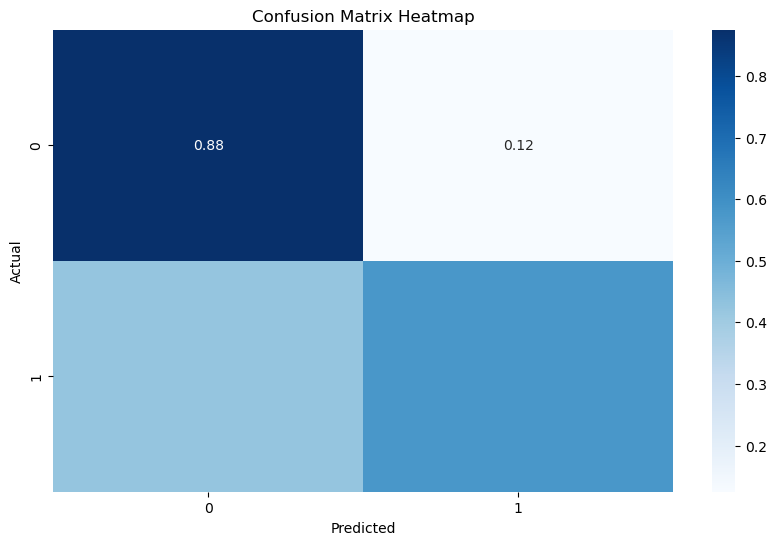

In [21]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Data/Beginner_Reviews_dataset.csv')

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values and drop rows with missing values
data = data.dropna()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add negation words to a separate set
negation_words = set(["not", "no", "never", "none", "n't"])

# Function to expand contractions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = re.sub(contraction, expanded, text)
    return text

# Define the preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Handle negations
    processed_words = []
    skip_next = False
    for i, word in enumerate(words):
        if word in negation_words and i + 1 < len(words):
            processed_words.append(f"{word}_{words[i + 1]}")
            skip_next = True
        elif skip_next:
            skip_next = False
        elif word not in stop_words:
            processed_words.append(lemmatizer.lemmatize(word))
    # Join the words back into a single string
    return ' '.join(processed_words)

# Apply the preprocessing function to the text data
data['cleaned_sentence'] = data['sentence'].apply(preprocess_text)

# Split the data into training and testing sets
X_cleaned = data['cleaned_sentence']
y_cleaned = data['label']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define hyperparameters for grid search
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_cleaned)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_cleaned, y_pred_best)
report_best = classification_report(y_test_cleaned, y_pred_best)

print(f'Accuracy of Best Model: {accuracy_best}')
print(f'Classification Report of Best Model: \n{report_best}')

# Create a DataFrame to display the reviews, their actual sentiments, and the predicted sentiments
results = pd.DataFrame({
    'Review': data.loc[y_test_cleaned.index, 'sentence'],  # Original reviews
    'Actual Sentiment': y_test_cleaned.values,
    'Predicted Sentiment': y_pred_best
})

# Display the DataFrame
print(results.head(10))

# Visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(results['Actual Sentiment'], results['Predicted Sentiment'], rownames=['Actual'], colnames=['Predicted'], normalize='index'), annot=True, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [26]:
data["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64